In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
dus18 = pd.read_csv('DUS2018.csv')
dus18 = dus18[['lytis', 'amzius','issilavinimas', 'bdu_spalio']]
dus18.head(3)

,lytis,amzius,issilavinimas,bdu_spalio
0,F,40-49,G2,460
1,M,50-59,G2,1487
2,M,40-49,G2,1500


In [ ]:
# boxplot() 
# budas vizualizuoti ir analizuoti duomenis

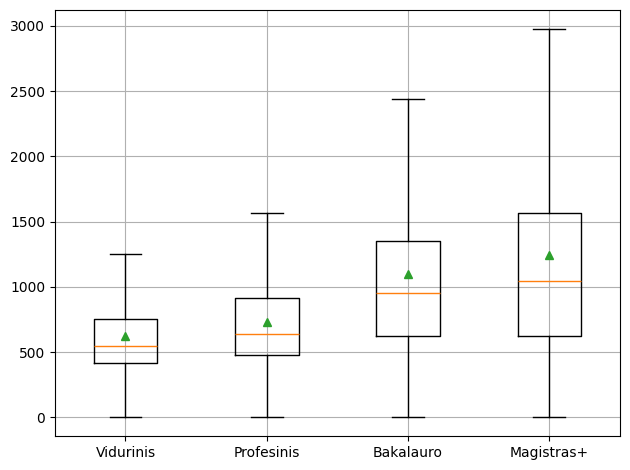

In [6]:
atl_g1 = dus18.query('issilavinimas == "G1"')['bdu_spalio'].values
atl_g2 = dus18.query('issilavinimas == "G2"')['bdu_spalio'].values
atl_g3 = dus18.query('issilavinimas == "G3"')['bdu_spalio'].values
atl_g4 = dus18.query('issilavinimas == "G4"')['bdu_spalio'].values

atl = [atl_g1, atl_g2, atl_g3, atl_g4] # kadangi turime daug sarasu, tai juos sukimgia, i viena, kad galetume jo pavadinima nurodyti boxplotui
edus = ['Vidurinis', 'Profesinis', 'Bakalauro', 'Magistras+'] # isivedame sarasa x asies pavadinimu

fig, axis = plt.subplots()
#plotting code:

axis.boxplot(atl,showmeans=True, showfliers=False) # showmeans=True prideda vidurkio pazymejima; showfliers=False nuima ektremalius taskus, ju neatvaizduoja, bet juos iskaiciuoja analizuojant

axis.set_xticklabels(edus) # cia pridedame pavadinimus x asiai is saraso aprasyto kaip edus

axis.grid() # uzdeda grida
#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

<Axes: >

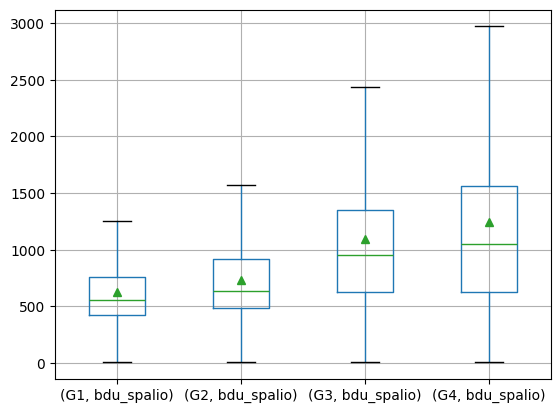

In [7]:
# II boxplot() variantas

dus18.groupby('issilavinimas').boxplot(column='bdu_spalio', subplots=False, showmeans=True, showfliers=False)
 # issilavinimas- stulpelis, kuriame skaiciai, 
 # bdy_spalio- stulpelis, kuriame pavadiimas; subplots=False sutraukia viska i viena lentele; 
 # showmeans=True parodo x asyje stulpeliu pavadinimus; 
 # showfliers=False nuima ektremalius taskus

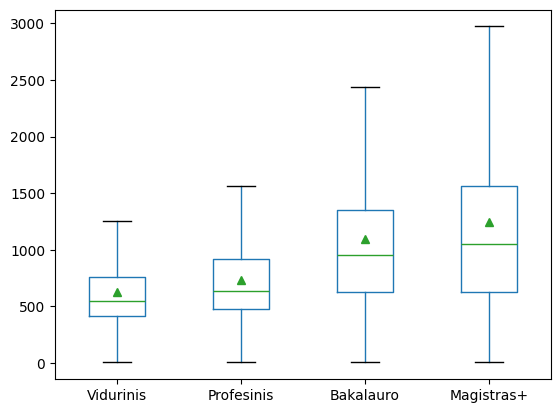

In [8]:
axis = dus18.groupby('issilavinimas').boxplot(column='bdu_spalio', subplots=False, showmeans=True, showfliers=False)
axis.grid(visible=False) # isjungem grida, kad veiktu, reikia pirmoje eiluteje parasyti 'axis ='
axis.set_xticklabels(edus) # priskyrem stulpeliu pavadinimus, kad veiktu, reikia pirmoje eiluteje parasyti 'axis ='

plt.show()

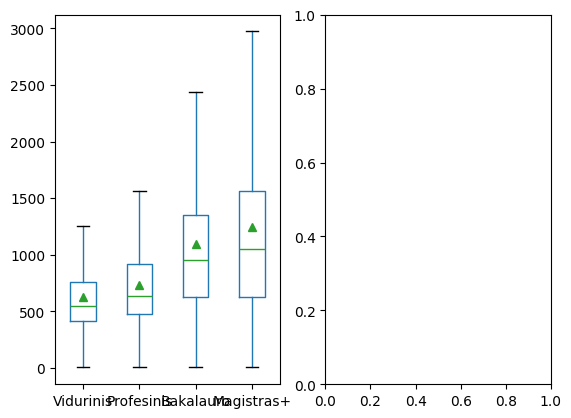

In [9]:
fig,(left, right) = plt.subplots(1,2) # paiso viena eilute su dviem stulpeliais; left ir right tai asiu pavadinimai kaip kintamieji

dus18.groupby('issilavinimas').boxplot(column='bdu_spalio', subplots=False, showmeans=True, showfliers=False, ax=left) #ax=left sudeda stulpelius i kairia asi. Desineje asyje galima sudeti koki nors grafika padaryta is kitos lenteles duomenu

left.grid(visible=False) # prirasom left, kad sudetu i left asi
left.set_xticklabels(edus) # prirasom left, kad sudetu i left asi

plt.show()

In [10]:
# sudėkite vizualizaciją boxplotais 2018 metų atlyginimų, pagal amžiaus grupes. su subplots() sukurkite 2 grafikus, kairiajame parodykite moterų statistiką, dešiniąjame - vyrų. Prisiminkite ir sudėkite ašių pavadinimus

dus14 = pd.read_csv('DUS2014.csv')
dus14 = dus18[['lytis', 'amzius','issilavinimas', 'bdu_spalio']]
dus14.head(3)

,lytis,amzius,issilavinimas,bdu_spalio
0,F,40-49,G2,460
1,M,50-59,G2,1487
2,M,40-49,G2,1500


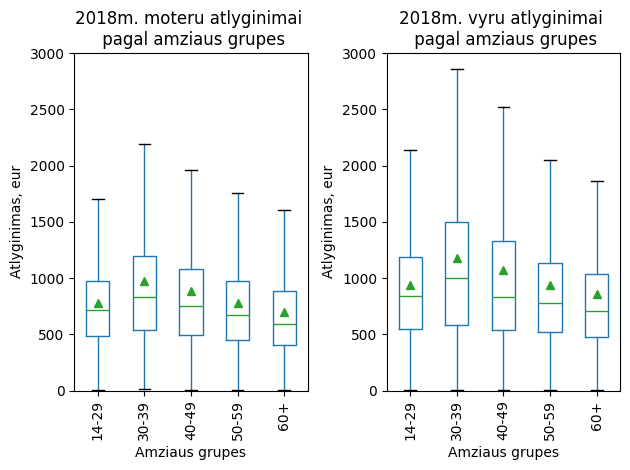

In [11]:
amziaus_grupes = dus18['amzius'].value_counts().sort_index(ascending=True).index # isrenka amziaus grupes is lenteles

fig,(left, right) = plt.subplots(1,2) # paiso viena eilute su dviem stulpeliais; left ir right tai asiu pavadinimai kaip kintamieji

dus18.query('lytis=="F"').groupby('amzius').boxplot(column='bdu_spalio', subplots=False, showmeans=True, showfliers=False, ax=left)
dus18.query('lytis=="M"').groupby('amzius').boxplot(column='bdu_spalio', subplots=False, showmeans=True, showfliers=False, ax=right)

left.grid(visible=False)
left.set_xticklabels(amziaus_grupes, rotation=90)

right.grid(visible=False)
right.set_xticklabels(amziaus_grupes, rotation=90)

left.set_xlabel("Amziaus grupes")
left.set_ylabel("Atlyginimas, eur")
left.set_title("2018m. moteru atlyginimai \n pagal amziaus grupes") # idejus \n perskeliam pavadinima ir dali jo nukeliam i kita eiltute, be to vienas ant kito uzlipa pavadinimai

right.set_xlabel("Amziaus grupes")
right.set_ylabel("Atlyginimas, eur")
right.set_title("2018m. vyru atlyginimai \n pagal amziaus grupes")

left.set_ylim(0,3000) # padaro y asies gradavima
right.set_ylim(0,3000) # suvienodiman abieju grafiku Y asiu gradavima

fig.tight_layout()

plt.show()

In [12]:
pip install seaborn # seaborn biblioteka grafiku braizymui, skiriasi nuo matplotlib , duomenu mokslininkai 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'


In [13]:
import seaborn as sns

In [14]:
# atlyginimimu pasiskirstymas pagal amziaus grupes

dus18.head()

,lytis,amzius,issilavinimas,bdu_spalio
0,F,40-49,G2,460
1,M,50-59,G2,1487
2,M,40-49,G2,1500
3,M,50-59,G2,1500
4,F,40-49,G2,400


In [15]:
plt.style.use(style='default')
#print(plt.style.available)
# bmh, classic, default, fivethirtyeight, ggplot ...
plt.style.use(style='default') # cia galima keisti grafiku stiliu

<Axes: xlabel='amzius', ylabel='bdu_spalio'>

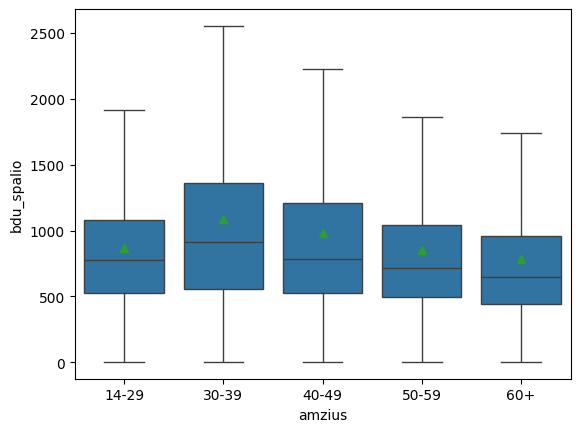

In [16]:
sns.boxplot(data=dus18.sort_values(by='amzius'), x = 'amzius', y= 'bdu_spalio', showmeans=True, showfliers=False) # reikia surusiuoti cia stulpeli, nes kitaip stulpeliai eis bet kokia tvarka, taip kaip duomenu lenteleje surasyta
# data- lentele, is kurios imam duomenis
# x ir y- nurodom kurie stulpeliai yra kurios asys

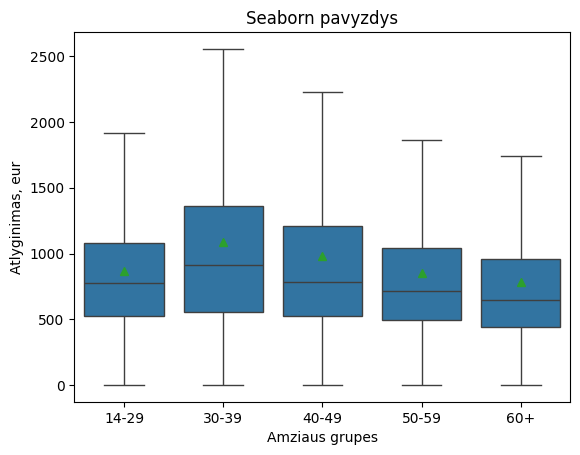

In [17]:
ax = sns.boxplot(data=dus18.sort_values(by='amzius'), x = 'amzius', y= 'bdu_spalio', showmeans=True, showfliers=False) # su ax padarome kintamaji ir veliau jam priskiriam pavadinima ar koki kita pakeitma lenteleje
ax.set_title('Seaborn pavyzdys')
ax.set_xlabel("Amziaus grupes")
ax.set_ylabel("Atlyginimas, eur")
plt.show()

In [19]:
# auto.csv:
# nuskaitykite jį, kainą į skaičių paverskite
# Su boxplotu vizualizuokite pirma visu (paskui 5kių) gamintojų, daugiausiai turinčių skelbimų,
# kainų pasiskirstymus.

auto = pd.read_csv('auto.csv', sep = '|')
auto.head()

auto_mini = auto[['gamintojas', 'modelis', 'price']]
auto_mini

def autoKaina(eurai):
    be_tarpu = float(eurai.replace(" ", ""))
    return be_tarpu

auto_mini['price']=auto_mini['price'].apply(autoKaina)
auto_mini.head()

C:\Users\Dovydaiciai\AppData\Local\Temp\ipykernel_17512\3724450883.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auto_mini['price']=auto_mini['price'].apply(autoKaina)


,gamintojas,modelis,price
0,BMW,M5,19500.0
1,Mitsubishi,Outlander,2700.0
2,Seat,Arona,13490.0
3,Skoda,Octavia Scout,14650.0
4,Volvo,XC90,38000.0


In [20]:
# gamintojo turimu skelbimu skaicius

auto_mini_modeliai = auto_mini.groupby(by='gamintojas')['modelis'].count().sort_values()
auto_mini_modeliai.tail().index # su index israso i viena eilute pavadinimus is gamintojo stulpelio, tada juos paimam ir isidedam i sarasa

Index(['Toyota', 'Mercedes-Benz', 'Audi', 'Volkswagen', 'BMW'], dtype='object', name='gamintojas')

In [23]:
gamintojai = auto_mini_modeliai.tail().index

auto.query('gamintojas in @gamintojai') # su siuo atrenkam is visu automobiliu tik tuos top 5

,index,id,gamintojas,modelis,pagaminimo_data,rida,variklis,kuro_tipas,varantieji_ratai,pavaros,...,service_book,warranty,catalytic_converter,multiple_key_sets,double_wheels,folding_seats,insulated_glass,two_sliding_doors,personal_ventilation,personal_illumination
0,0,ID:22996628,BMW,M5,2005-12,253 000 km,"4999 cm³, 507 AG (373kW)",Benzinas,Galiniai,Automatinė,...,0,0,0,0,0,0,0,0,0,0
5,5,ID:23116585,Audi,80,1987-07,194 000 km,"1760 cm³, 88 AG (65kW)",Benzinas,Nenurodyta,Mechaninė,...,0,0,0,0,0,0,0,0,0,0
8,8,ID:22167198,BMW,320,2017-07,158 486 km,"2000 cm³, 163 AG (120kW)",Dyzelinas,Galiniai,Automatinė,...,0,0,0,0,0,0,0,0,0,0
9,9,ID:20581824,Volkswagen,Passat,2019-01,150 869 km,"1600 cm³, 120 AG (88kW)",Dyzelinas,Priekiniai,Automatinė,...,0,0,0,0,0,0,0,0,0,0
10,10,ID:21005894,BMW,520,2018-03,74 455 km,"1995 cm³, 190 AG (140kW)",Dyzelinas,Galiniai,Automatinė,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2393,1433,ID:23119057,Toyota,RAV4,2005-08,286 544 km,"2000 cm³, 116 AG (85kW)",Dyzelinas,Visi varantys (4х4),Mechaninė,...,0,0,0,0,0,0,0,0,0,0
2394,1434,ID:23112761,Volkswagen,Passat,2007-12,291 400 km,"2000 cm³, 140 AG (103kW)",Dyzelinas,Nenurodyta,Automatinė,...,0,0,0,0,0,0,0,0,0,0
2397,1437,ID:23052920,Volkswagen,Golf,2007-06,282 000 km,"1590 cm³, 102 AG (75kW)",Benzinas,Priekiniai,Mechaninė,...,0,0,0,0,0,0,0,0,0,0
2398,1438,ID:23000520,Audi,A4,2006-10,260 000 km,"2000 cm³, 140 AG (103kW)",Dyzelinas,Nenurodyta,Mechaninė,...,0,0,0,0,0,0,0,0,0,0


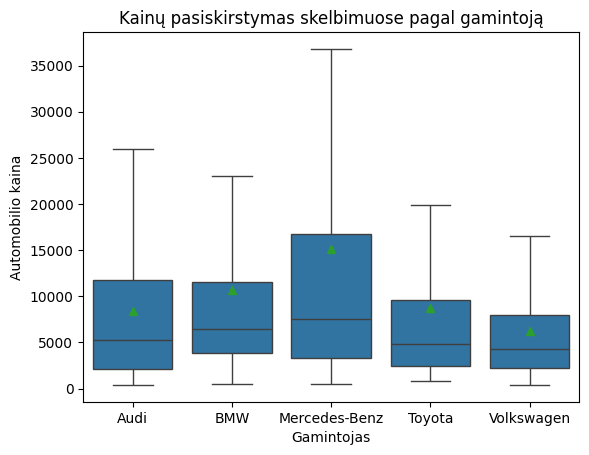

In [24]:
ax = sns.boxplot(auto_mini.query('gamintojas in @gamintojai').sort_values(by='gamintojas'), x = 'gamintojas', y= 'price', showmeans=True, showfliers=False)

ax.set_title('Kainų pasiskirstymas skelbimuose pagal gamintoją')
ax.set_xlabel("Gamintojas")
ax.set_ylabel("Automobilio kaina")

plt.show()

In [25]:
axis = auto_mini_modeliai.groupby('gamintojas').boxplot(column='price', subplots=False, showmeans=True, showfliers=False)
axis.grid(visible=False)

plt.show()

AttributeError: 'SeriesGroupBy' object has no attribute 'boxplot'

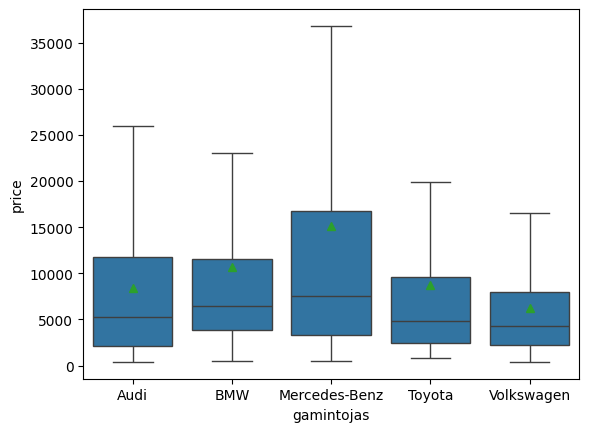

In [26]:
auto = pd.read_csv('auto.csv', sep='|')[['gamintojas','price','modelis','rida']]
auto['price'] = auto['price'].str.replace(' ','').apply(float)
g = list(auto['gamintojas'].value_counts().sort_values(ascending=False).index[:5])
sns.boxplot(data=auto.query('gamintojas in @g').sort_values(by='gamintojas'), x='gamintojas', y='price', showmeans=True, showfliers=False)
plt.show()

In [27]:
# .dt - datos funkciju modulis
# .str - string funkciju modulis, dokumentacija- https://www.geeksforgeeks.org/top-10-string-methods-in-pandas/

auto_mini.head()

,gamintojas,modelis,price
0,BMW,M5,19500.0
1,Mitsubishi,Outlander,2700.0
2,Seat,Arona,13490.0
3,Skoda,Octavia Scout,14650.0
4,Volvo,XC90,38000.0


In [28]:
auto['G'] = auto['gamintojas'].str.upper().str[:3] # upper, lower, index. replace galima pasiekti naudojant str funkcija
auto.head()

,gamintojas,price,modelis,rida,G
0,BMW,19500.0,M5,253 000 km,BMW
1,Mitsubishi,2700.0,Outlander,195 405 km,MIT
2,Seat,13490.0,Arona,129 800 km,SEA
3,Skoda,14650.0,Octavia Scout,183 000 km,SKO
4,Volvo,38000.0,XC90,127 896 km,VOL


In [29]:
# webscrapinimas

# vienos svetaines suteikia prieiga prie duomenu, kitas reikia scrapinti

In [30]:
import requests as rq

In [308]:
del print

In [33]:
url = "https://api.meteo.lt/v1/stations"


response = rq.get(url)
print(response) # jei response ismeta "<Response [200]>" tai reiskia viskas gerai, reikia

stations = response.json() # paima json formato teksta ir ji interpretuoja
print(stations) # atspausdino visas meteorologines stotis

<Response [200]>
[{'code': 'birzu-ams', 'name': 'Biržų AMS', 'coordinates': {'latitude': 56.193191, 'longitude': 24.774184}}, {'code': 'dotnuvos-ams', 'name': 'Dotnuvos AMS', 'coordinates': {'latitude': 55.395993, 'longitude': 23.866224}}, {'code': 'duksto-ams', 'name': 'Dūkšto AMS', 'coordinates': {'latitude': 55.517856, 'longitude': 26.31614}}, {'code': 'kauno-ams', 'name': 'Kauno AMS', 'coordinates': {'latitude': 54.88396, 'longitude': 23.83588}}, {'code': 'klaipedos-ams', 'name': 'Klaipėdos AMS', 'coordinates': {'latitude': 55.73135, 'longitude': 21.09157}}, {'code': 'kybartu-ams', 'name': 'Kybartų AMS', 'coordinates': {'latitude': 54.633167, 'longitude': 22.783011}}, {'code': 'laukuvos-ams', 'name': 'Laukuvos AMS', 'coordinates': {'latitude': 55.60886, 'longitude': 22.239463}}, {'code': 'lazdiju-ams', 'name': 'Lazdijų AMS', 'coordinates': {'latitude': 54.23221, 'longitude': 23.51068}}, {'code': 'nidos-ams', 'name': 'Nidos AMS', 'coordinates': {'latitude': 55.30221, 'longitude': 21

In [34]:
#iš to responso išrinkite į sąrašą visus ams kodus ('code' raktažodis)

kodai = []

for elementas in stations:
    kodai.append(elementas['code'])
print(kodai)

['birzu-ams', 'dotnuvos-ams', 'duksto-ams', 'kauno-ams', 'klaipedos-ams', 'kybartu-ams', 'laukuvos-ams', 'lazdiju-ams', 'nidos-ams', 'panevezio-ams', 'raseiniu-ams', 'siauliu-ams', 'silutes-ams', 'telsiu-ams', 'ukmerges-ams', 'utenos-ams', 'varenos-ams', 'vilniaus-ams']


In [35]:
#atrinkiti visų stočių užfiksuotą temperatūrą 00:00:00 laiku, šiai dienai

temperaturos = []

for stotis in kodai:
    url = f'https://api.meteo.lt/v1/stations/{stotis}/observations/2024-04-18'
    # print(url)
    response = rq.get(url)
    temp = response.json()
    sarasas = temp["observations"][0]["airTemperature"] # paima is nuorodos su vienos stoties duomenimis nulini zodyna(nes jame yra uzfiksuota 00:00:00val temperatura) ir jame salia airTemperature esancia reiksme
    temperaturos.append(sarasas)

print(temperaturos) 

[1.9, 4.7, 0.5, 4.6, 3.6, 3.8, 3, 4.3, 4.6, 3.5, 1.2, 2.8, 4, 3.3, 2.5, 0.6, 1.6, 3.5]


In [37]:
#rasti 3 meteo stotis, kuriose fiksuota temperatūra 00:00 laiku buvo didžiausia:

df=pd.DataFrame() # taip sukuria tuscia data frame
df['stotis']=stotys
df['temperatura']= temperaturos

df.sort_values(by='temperatura', ascending=False).head(3)

NameError: name 'stotys' is not defined